# Fast Dash

Fast Dash makes web application development fast and easy.

Documentation: https://docs.fastdash.app/

<img src="https://storage.googleapis.com/fast_dash/0.1.8/logo.png" alt="Jupyter Logo" width="400"/>

- Fast Dash reads everything about a Python function, like the function name, docstring, and input and output type hints, to **automatically generate a layout** and deploy an interactive web application.

- The callback function and Fast Dash app configurations together determine how the app is deployed and the level of user interaction. A well-annotated callback function almost always ensures minimal custom tweaking of app configurations.

In [ ]:
def my_function(a: str, b: int) -> (str, plt.Figure, PIL.Image):
    """Best function ever"""

    # Function implementation

    return text, matplotlib_figure, image

In [1]:
from fast_dash import fastdash

### Let's build a simple Fast Dash app

In [49]:
# Simple text to text app

@fastdash
def text_to_text(input_text: str) -> str:
    output_text = input_text
    return output_text

### Multiple inputs and outputs

You can build web applications from function requiring mutliple inputs and outputs.

In [50]:
import requests
import matplotlib.pyplot as plt
from fast_dash import fastdash, PIL

Dash app running on http://127.0.0.1:8081/


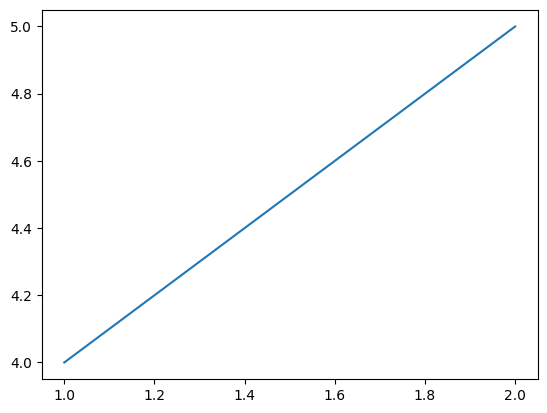

In [43]:
@fastdash
def my_function(a: str, b: int) -> (str, plt.Figure, PIL.Image.Image):
    """Best function ever"""

    # Function implementation
    text = "Output"
    matplotlib_figure = plt.plot([1, 2], [4, 5])[0].figure
    image = PIL.Image.open(requests.get("https://storage.googleapis.com/fast_dash/0.1.8/logo.png", stream=True).raw)

    return text, matplotlib_figure, image

#### Controlling output layouts

You can specify string-based mosaics to control the output layouts. For example, let's say that we desire the layout given in the image below for the 3-output function we defined earlier.

<img src="https://storage.googleapis.com/fast_dash/0.2.7/Mosaic%20examples/ex2.png" alt="Jupyter Logo" width="900"/>

The mosaic string corresponding to this layout is 

**AB <br>
CC**

Each alphabet refers to one output component. The arrangement of alphabets chosen in the mosaic string determines the layout of output components.

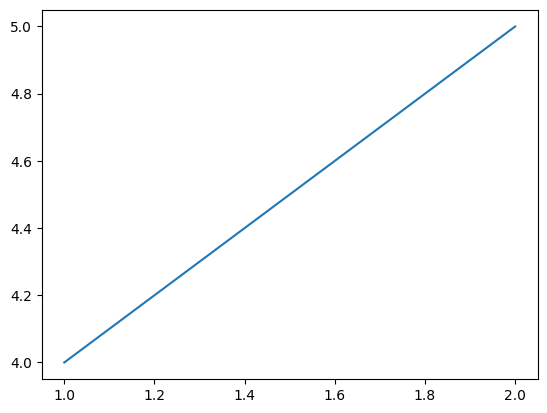

In [55]:
mosaic = """
AB
AC
"""

@fastdash(mosaic=mosaic, port=8081)
def my_function(a: str, b: int) -> (str, plt.Figure, PIL.Image.Image):
    """Best function ever"""

    # Function implementation
    text = "Output"
    matplotlib_figure = plt.plot([1, 2], [4, 5])[0].figure
    image = PIL.Image.open(requests.get("https://storage.googleapis.com/fast_dash/0.1.8/logo.png", stream=True).raw)

    return text, matplotlib_figure, image

### Choosing input and output components

Fast Dash relies on **type hints and specified default values** to determine input and output components. As of today, these type hints can be:

- Python data types (`str`, `float`, `plt.Figure`)
- Built-in components (`Text`, `Chat`, `Graph`, `Table`)
- Other Dash components (`dcc.Dropdown`, `dmc.Table`)

The same input hint can yield different components based on default values. For example, for inpyt type `str`, a string default value (or no default value) returns the `Text` component. But if the default value is a list, it returns a dropdown. 

In [59]:
@fastdash
def datetime_example(date: datetime.date):
    return date

In [74]:
@fastdash
def boolean_example(is_true: bool = False):

    if is_true:
        response =  "Correct"

    else:
        response = "Wrong"

    return response

Notice the difference in input components with changing default values

In [75]:
@fastdash
def default_value_is_str(input_text: str = "A"):
    return input_text

In [76]:
@fastdash
def default_value_is_list(input_text: str = ["A", "B", "C"]):
    return input_text

In [78]:
# In this example, the input data type is a list

@fastdash
def default_value_is_list(input_text: list = ["A", "B", "C"]):
    processed_list = ", ".join(input_text)
    return processed_list

#### Built-in components can be used for ease-of-use

In [80]:
from fast_dash import UploadImage, Image

@fastdash
def image_to_image(upload_image: UploadImage) -> Image:
    return upload_image

In [82]:
import pandas as pd
from fast_dash import UploadImage, Image, Table

@fastdash
def image_to_image(upload_image: UploadImage) -> (Image, Table):

    df = pd.DataFrame(dict(A=[1, 2, 3], B=[4, 5, 6]))
    return upload_image, df

In [85]:
from fast_dash import Chat

@fastdash
def chat_example(question: str) -> Chat:

    response = "I am Groot!"
    response = dict(query=question, response=response)
    
    return response

#### Using Dash components

If there's a Dash component that Fast Dash doesn't support out of the box, it can also be used with Fast Dash.

Fast Dash's `Fastify` class converts a Dash components into a Fast Dash component.

In [21]:
import dash_mantine_components as dmc
from fast_dash import Fastify
# from fast_dash import dmc

chip_component = Fastify(dmc.Chip("Chip"), component_property="checked")

password_component = Fastify(dmc.PasswordInput(
	placeholder="Password",
	label="Enter your password",
	description="Password must include at least one letter, number and special character",
	size="sm",
	radius="sm",
	required=True,
), "value")

@fastdash
def dash_components(is_true: chip_component,
                   password: password_component):
    if is_true:
        response =  "Correct"

    else:
        response = "Wrong"

    return response    

### Multi-input, multi-output example

In [23]:
from fast_dash import dmc, PIL, Text, Chat, Table, Image, UploadImage, Graph

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

mosaic =  """
AFD
CED
BBB
"""

@fastdash(mosaic=mosaic, mode="external")
def chat_example(upload_image: UploadImage,
                 password: password_component,
                 select_value: float,
                 query: str) -> (PIL.Image.Image, Graph, Table, Chat, str, plt.Figure):

    image = upload_image
    plotly_figure = px.scatter(x=[0, 1, 2, 3, 4], y=[0, 1, 4, 9, 16])
    df = pd.DataFrame(dict(A=[1, 2, 3], B=[4, 5, 6]))

    response = "I am Groot!"
    response = dict(query=query, response=response)

    scores = select_value
    matplotlib_figure = plt.plot([1, 2], [4, 5])[0].figure
    
    return image, plotly_figure, df, response, scores, matplotlib_figure

/Users/dkedar7/.venvs/showyourwork/lib/python3.13/site-packages/fast_dash/Components.py:843: UserWarning:

Unknown or unsupported default value type. Assuming text.



Dash app running on http://127.0.0.1:8080/


## Notifications

- Errors automatically trigger notifications
- But they can also be manually triggered using the `notify` method

In [3]:
# Example of an error triggering a notification

@fastdash
def example_with_error(input_text: str):
    return output_text

/Users/dkedar7/.venvs/showyourwork/lib/python3.13/site-packages/fast_dash/Components.py:843: UserWarning:

Unknown or unsupported default value type. Assuming text.



Traceback (most recent call last):
  File "/Users/dkedar7/.venvs/showyourwork/lib/python3.13/site-packages/fast_dash/fast_dash.py", line 426, in process_input
    output_state = self.callback_fn(*inputs)
  File "/var/folders/ql/6fgfr6zx3jg3gt8b2f33bnqh0000gn/T/ipykernel_21452/2195621241.py", line 5, in example_with_error
    return output_text
           ^^^^^^^^^^^
NameError: name 'output_text' is not defined. Did you mean: 'input_text'?


In [4]:
# Example of an error triggering a notification

@fastdash
def example_with_error(input_text: str):

    if not input_text.endswith("?"):
        raise Exception("input_text must always end with a '?'")
        
    return input_text

Traceback (most recent call last):
  File "/Users/dkedar7/.venvs/showyourwork/lib/python3.13/site-packages/fast_dash/fast_dash.py", line 426, in process_input
    output_state = self.callback_fn(*inputs)
  File "/var/folders/ql/6fgfr6zx3jg3gt8b2f33bnqh0000gn/T/ipykernel_21452/4128872171.py", line 7, in example_with_error
    raise Exception("input_text must always end with a '?'")
Exception: input_text must always end with a '?'
Traceback (most recent call last):
  File "/Users/dkedar7/.venvs/showyourwork/lib/python3.13/site-packages/fast_dash/fast_dash.py", line 426, in process_input
    output_state = self.callback_fn(*inputs)
  File "/var/folders/ql/6fgfr6zx3jg3gt8b2f33bnqh0000gn/T/ipykernel_21452/4128872171.py", line 7, in example_with_error
    raise Exception("input_text must always end with a '?'")
Exception: input_text must always end with a '?'


In [7]:
# Using notify to show other app updates
import time
from fast_dash import Chat, notify

@fastdash
def notify_example(input_text: str) -> Chat:

    notify("Finding the answer for you")
    time.sleep(2)

    start_time = time.time()
    while time.time() - start_time < 10:
        
        notify("Working very hard ...")
        time.sleep(3)

    reply = dict(query=input_text, response=f"Here's my response to {input_text}: No!")

    return reply

## Use `update` to stream component updates

In [4]:
# Most useful in streaming text responses
import time

from fast_dash import update

@fastdash(loader=False, mode="external")
def stream_text(input_text: str):

    output = f"My response to {input_text} is: it's not possible!"

    reply = ""
    for character in output:
        reply += character
        update("reply", reply)
        time.sleep(0.1)

    return reply

Dash app running on http://127.0.0.1:8080/


In [2]:
# Use with a `Chat` component

import time
from fast_dash import fastdash, Chat, update

@fastdash(loader=False, mode="external")
def stream_text(input_text: str) -> Chat:

    output = f"My response to {input_text} is: it's not possible!"

    # Update the query
    update("response", input_text, property="query")

    reply = ""
    for character in output:
        reply += character

        # Update the reply
        update("response", reply, property="response")
        time.sleep(0.1)

    response = dict(query=input_text, response=reply)

    return response

Dash app running on http://127.0.0.1:8080/


/Users/dkedar7/.venvs/showyourwork/lib/python3.13/site-packages/fast_dash/Components.py:843: UserWarning:

Unknown or unsupported default value type. Assuming text.



In [ ]:
Chat(stream=True)

Div(style={'overflow-y': 'scroll', 'overflow-x': 'hidden', 'display': 'flex', 'flex-direction': 'column-reverse'})

: 

## Challenge: Now create a Fast Dash web app using your dataset

In [ ]:
from fast_dash import fastdash